<h1> Session 1 - Introduction to Recommendation Systems</h1>

This is the first session in the recommendation systems series.
In this part we perform some data visualization for the Movie Lens dataset

The Movie Lens dataset can be downloaded from https://grouplens.org/datasets/movielens/

<h3> Step 1 - Import the required packages </h3>

Import the require packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3> Step 2 - Update the data files into Azure Notebooks </h3>

<img src="https://notebooks.azure.com/content/jupyter-data-tab.gif">

<h3> Step 3 - Load the data from multiple files into data frames </h3>

Load the data from the multiple files into several dataframes

- u.info file contains information about the dataset
- u.user file contains a list of all the users
- u.occupation file contains information regarding the occupation of the users
- u.genre file contains information regarding the genre of the movies (including their count)
- u.item file contains a list of all the movie items
- u.data file contains a list of 100,000 ratings made by 943 users on 1682 movie items

In [3]:
# General information about dataset
df_u_info = pd.read_csv('/home/nbuser/library/u.info', header=None, sep=' ')

# List of users
df_u_user = pd.read_csv('/home/nbuser/library/u.user', sep='|')

# List of user occupation
df_u_occupation = pd.read_csv('/home/nbuser/library/u.occupation', header=None)

# List of movie genre (and movie count by genre)
df_u_genre = pd.read_csv('/home/nbuser/library/u.genre', sep='|', header=None)

# List of movie items
#df_u_item = pd.read_csv('/home/nbuser/library/u.item', sep='|')

# Transactional user data
df_u_data = pd.read_csv('/home/nbuser/library/u.data', sep='\t')

<h3>Step 4 - Analyze the dataframe</h3>

Determine the datatype of the data that is being used.

In [ ]:
type(df_u_info)

Check the columns in a dataframe (only those that actually have a header row

In [7]:
df_u_user.columns
df_u_data.columns

Index(['UserID', 'ItemId', 'Rating', 'Timestamp'], dtype='object')

For each dataframe, display a sample set of records from the begining.

In [ ]:
df_u_info.head()
df_u_user.head()
df_u_occupation.head()
df_u_genre.head()

For each dataframe, display a sample set of records from the bottom.

In [ ]:
df_u_info.tail()

If all the records need to be displayed, then simply type the dataframe name

In [ ]:
df_u_occupation

<h3>Step 5 - Aggregate Level Analysis</h3>

The above analysis focused on the individual records of the dataframe. However, at times aggregate analysis needs to be done too. For this, aggregate functions of the dataframe can be used.

Count the number of records for a given column.

In [ ]:
df_u_data['Rating'].count()

Count the number of movie items, for each rating.

In [ ]:
df_u_data.groupby(['Rating'])['ItemId'].count()

Count the number of ratings given, for each movie items

In [ ]:
df_u_data.groupby(['ItemId'])['Rating'].count()

Same query as above, but this time sorted by the ratings count and only show the top 5 values

In [ ]:
df_u_data.groupby(['ItemId'])['Rating'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

Instead of count, other aggregate functions can also be used, like mean. So what is the average rating given by a user.

In [ ]:
df_u_data.groupby(['UserID'])['Rating'].mean()

A simple mathematical function, with no aggregation on a column.

In [ ]:
df_u_data['Rating'].std()

<h3>Step 6 - Some basic plots</h3>

Create a simple histogram for the user activity, based on the rating criteria.

(array([  6110.,      0.,  11370.,      0.,      0.,  27145.,      0.,
         34174.,      0.,  21201.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

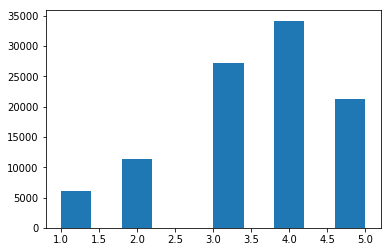

In [4]:
plt.hist(df_u_data['Rating'])

Create a more complicated histogram, this time with the movie items being the criteria.

(array([  1.14600000e+03,   2.49000000e+02,   1.39000000e+02,
          6.70000000e+01,   3.80000000e+01,   2.40000000e+01,
          7.00000000e+00,   5.00000000e+00,   6.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   59.2,  117.4,  175.6,  233.8,  292. ,  350.2,  408.4,
         466.6,  524.8,  583. ]),
 <a list of 10 Patch objects>)

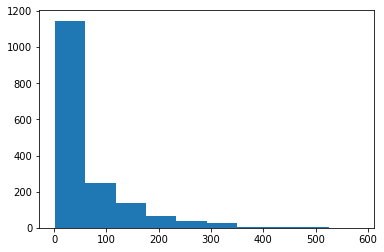

In [5]:
plt.hist(df_u_data.groupby(['ItemId'])['Rating'].count())

<h3>Step 7 - Additional plot types</h3>

Let's visualize the generated ratings over time. For this a time series plot is required that would show the ratings given by users over a time period.

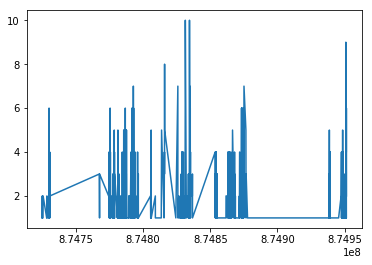

In [14]:
plt.plot(df_u_data.groupby(['Timestamp'])['Rating'].count().head(1000))

In [ ]:
df_u_data.plot(kind='scatter', x='UserID', y='Rating')